In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
sample_submission = pd.read_csv("F:\ipynb files\ML Sessions\Big_Mart\sample_submission.csv")
train = pd.read_csv("F:\\ipynb files\\ML Sessions\\Big_Mart\\train.csv")
test = pd.read_csv("F:\\ipynb files\\ML Sessions\\Big_Mart\\test.csv")

In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
#EDA

train.columns.difference(test.columns)

Index(['Item_Outlet_Sales'], dtype='object')

In [8]:
#Preprocessing on both train and test

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [12]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [13]:
train['source'] = 'train'
test['source'] = 'test'

In [14]:
df = pd.concat([train,test])

In [15]:
df[:3]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train


In [16]:
df.loc[df['source'] == 'train'][:3]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train


In [17]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [25]:
numerical = df.select_dtypes(include = np.number).drop(columns = ['Outlet_Establishment_Year', 'Item_Outlet_Sales'])

categorical = df.select_dtypes(exclude = np.number).columns

In [27]:
df[categorical].apply(lambda X:X.value_counts())

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
Baking Goods,NaN,NaN,1086.0,NaN,NaN,NaN,NaN,NaN
Breads,NaN,NaN,416.0,NaN,NaN,NaN,NaN,NaN
Breakfast,NaN,NaN,186.0,NaN,NaN,NaN,NaN,NaN
Canned,NaN,NaN,1084.0,NaN,NaN,NaN,NaN,NaN
DRA12,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
Tier 3,NaN,NaN,NaN,NaN,NaN,5583.0,NaN,NaN
low fat,NaN,178.0,NaN,NaN,NaN,NaN,NaN,NaN
reg,NaN,195.0,NaN,NaN,NaN,NaN,NaN,NaN
test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5681.0


In [29]:
df['Item_Identifier_2'] = df['Item_Identifier'].apply(lambda X:X[0:2])
df['Item_Identifier_3'] = df['Item_Identifier'].apply(lambda X:X[0:3])
df['Item_Identifier_3'].value_counts().tail(10)
df['Item_Identifier_2'].value_counts()
df.groupby(by = ['Item_Identifier_2', 'Item_Type'])['Item_Identifier'].count()
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({"LF":"Low Fat", "reg":"Regular", "low fat":"Low Fat"})
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [30]:
train.groupby(['Outlet_Type', 'Outlet_Size'])['Item_Outlet_Sales'].mean()

Outlet_Type        Outlet_Size
Grocery Store      Small           340.329723
Supermarket Type1  High           2298.995256
                   Medium         2348.354635
                   Small          2358.343066
Supermarket Type2  Medium         1995.498739
Supermarket Type3  Medium         3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [32]:
df.groupby(['Item_Identifier_2', 'Item_Fat_Content']).count()

Item_Identifier  Item_Weight  \
Item_Identifier_2 Item_Fat_Content                                 
DR                Low Fat                      1208         1006   
                  Regular                       109           91   
FD                Low Fat                      5291         4378   
                  Regular                      4910         4067   
NC                Low Fat                      2686         2223   

                                    Item_Visibility  Item_Type  Item_MRP  \
Item_Identifier_2 Item_Fat_Content                                         
DR                Low Fat                      1208       1208      1208   
                  Regular                       109        109       109   
FD                Low Fat                      5291       5291      5291   
                  Regular                      4910       4910      4910   
NC                Low Fat                      2686       2686      2686   

                                    Outlet_Identifier  \
Item_Identifier_2 Item_Fat_Content                      
DR                Low Fat                        1208   
                  Regular                         109   
FD                Low Fat                        5291   
                  Regular                        4910   
NC                Low Fat                        2686   

                                    Outlet_Establishment_Year  Outlet_Size  \
Item_Identifier_2 Item_Fat_Content                                           
DR                Low Fat                                1208          863   
                  Regular                                 109           78   
FD                Low Fat                                5291         3803   
                  Regular                                4910         3520   
NC                Low Fat                                2686         1924   

                                    Outlet_Location_Type  Outlet_Type  \
Item_Identifier_2 Item_Fat_Content                                      
DR                Low Fat                           1208         1208   
                  Regular                            109          109   
FD                Low Fat                           5291         5291   
                  Regular                           4910         4910   
NC                Low Fat                           2686         2686   

                                    Item_Outlet_Sales  source  \
Item_Identifier_2 Item_Fat_Content                              
DR                Low Fat                         728    1208   
                  Regular                          71     109   
FD                Low Fat                        3190    5291   
                  Regular                        2935    4910   
NC                Low Fat                        1599    2686   

                                    Item_Identifier_3  
Item_Identifier_2 Item_Fat_Content                     
DR                Low Fat                        1208  
                  Regular                         109  
FD                Low Fat                        5291  
                  Regular                        4910  
NC                Low Fat                        2686

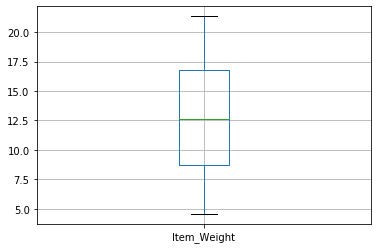

In [42]:
df.boxplot(column = ['Item_Weight'])

In [43]:
df.groupby(['Item_Type'])['Item_Weight'].mean()

Item_Type
Baking Goods             12.275211
Breads                   11.152362
Breakfast                13.179112
Canned                   12.340830
Dairy                    13.238358
Frozen Foods             12.569323
Fruits and Vegetables    13.194406
Hard Drinks              11.576205
Health and Hygiene       13.171739
Household                13.337977
Meat                     12.766104
Others                   13.915724
Seafood                  12.760274
Snack Foods              12.865732
Soft Drinks              11.788408
Starchy Foods            13.659758
Name: Item_Weight, dtype: float64

In [44]:
df.groupby(['Item_Identifier_2'])['Item_Weight'].mean()

Item_Identifier_2
DR    12.116645
FD    12.735577
NC    13.344139
Name: Item_Weight, dtype: float64

In [46]:
df['Item_Weight'] = df.groupby('Item_Identifier_2').Item_Weight.transform(lambda X:X.fillna(X.mean()))
df['Item_Weight']

0        9.30
1        5.92
2       17.50
3       19.20
4        8.93
        ...  
5676    10.50
5677     7.60
5678    10.00
5679    15.30
5680     9.50
Name: Item_Weight, Length: 14204, dtype: float64

In [47]:
df[categorical].isna().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             4016
Outlet_Location_Type       0
Outlet_Type                0
source                     0
dtype: int64

In [49]:
df.loc[df['Item_Visibility'] == 0.000000, 'Item_Visibility'] = np.nan

In [50]:
df['Item_Visibility'] = df.groupby('Item_Identifier_2').Item_Visibility.transform(lambda X:X.fillna(X.mean()))

In [51]:
df['Item_Visibility'] 

0       0.016047
1       0.019278
2       0.016760
3       0.072558
4       0.062099
          ...   
5676    0.013496
5677    0.142991
5678    0.073529
5679    0.072558
5680    0.104720
Name: Item_Visibility, Length: 14204, dtype: float64

In [52]:
df['Item_Visibility'].describe()

count    14204.000000
mean         0.070305
std          0.048601
min          0.003575
25%          0.033143
50%          0.062099
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [53]:
#Filling non-numerical

df['Outlet_Sales'] = df.groupby(by = ['Outlet_Type']).Outlet_Size.transform(lambda X:X.fillna(X.mode()[0]))

In [54]:
df['Outlet_Sales'] 

0       Medium
1       Medium
2       Medium
3        Small
4         High
         ...  
5676     Small
5677    Medium
5678     Small
5679     Small
5680     Small
Name: Outlet_Sales, Length: 14204, dtype: object

In [59]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
source                          0
dtype: int64

In [60]:
corr_ = train.corr()

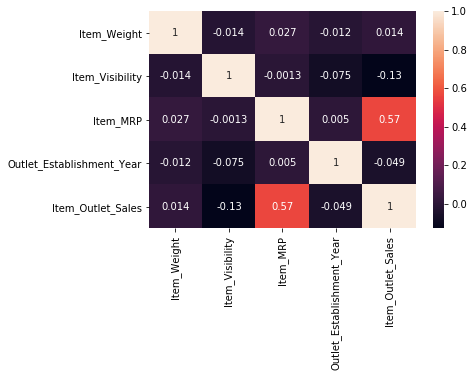

In [61]:
sns.heatmap(corr_, annot=True)

In [65]:
X = train.select_dtypes(include = np.number).drop(columns = 'Item_Outlet_Sales')
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.300,0.016047,249.8092,1999
1,5.920,0.019278,48.2692,2009
2,17.500,0.016760,141.6180,1999
3,19.200,0.000000,182.0950,1998
4,8.930,0.000000,53.8614,1987
...,...,...,...,...
8518,6.865,0.056783,214.5218,1987
8519,8.380,0.046982,108.1570,2002
8520,10.600,0.035186,85.1224,2004
8521,7.210,0.145221,103.1332,2009


In [66]:
vif_data = pd.DataFrame()

In [67]:
vif_data['Features'] = X.columns

In [68]:
vif_data

,Features
0,Item_Weight
1,Item_Visibility
2,Item_MRP
3,Outlet_Establishment_Year


In [74]:
j = len(X.columns)
j

4

In [77]:
df['Out_Age'] = 2013 - df['Outlet_Establishment_Year']
df['Out_Age'] 

0       14
1        4
2       14
3       15
4       26
        ..
5676    16
5677     4
5678    11
5679     6
5680    11
Name: Out_Age, Length: 14204, dtype: int64

In [78]:
df.drop(columns = ['Outlet_Establishment_Year'], inplace = True)
df.drop(columns = ['Outlet_Size'], inplace = True)
train = df.loc[df['Source'] == 'train']
test = df.loc[df['Source'] == 'test']

X = train.select.dtypes(include = np.number).drop(columns = 'Item_Outlet_Sales')

KeyError: 'Source'